In [ ]:
# Importing Libararies

import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import torch.nn as nn
import matplotlib.pyplot as plt
import os

Defining the CNN model and loading the pretrained model

In [9]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.5)
        
        self.fc1 = nn.Linear(128 * 4 * 4, 64)
        self.fc2 = nn.Linear(64, 19)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        
        x = self.flatten(x)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = self.fc2(x)
        return x

model = CNN()
model.load_state_dict(torch.load('handwritten_math_symbols_model.pth'))
model.eval()

C:\Users\pc\AppData\Local\Temp\ipykernel_2308\3363004994.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('handwritten_math_symbols_mode

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=2048, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=19, bias=True)
)

Predicting some images from "trial_data" directory

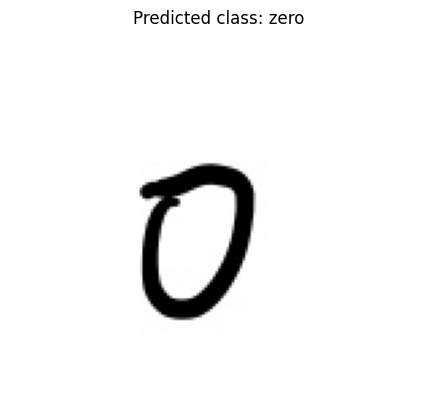

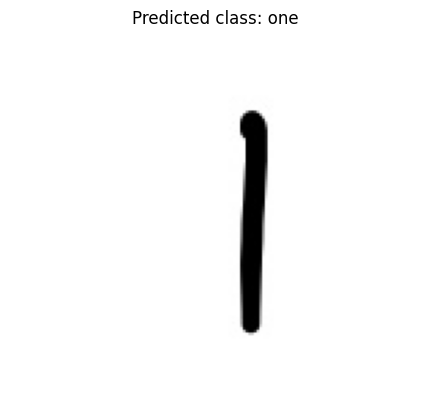

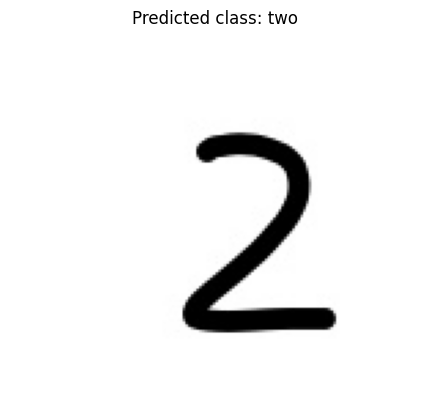

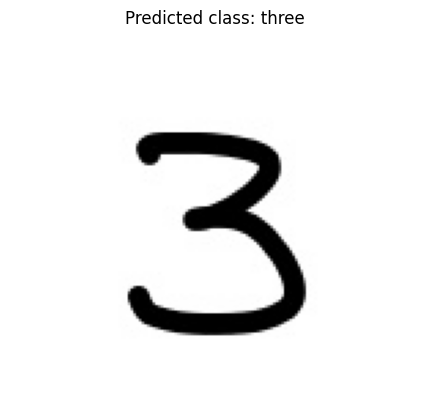

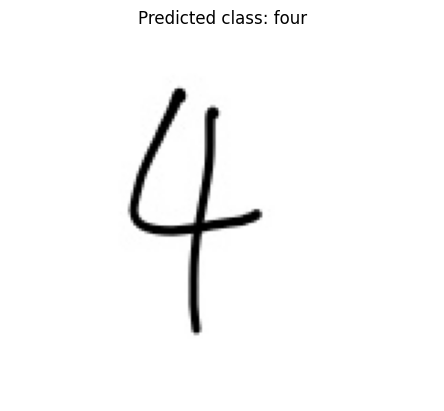

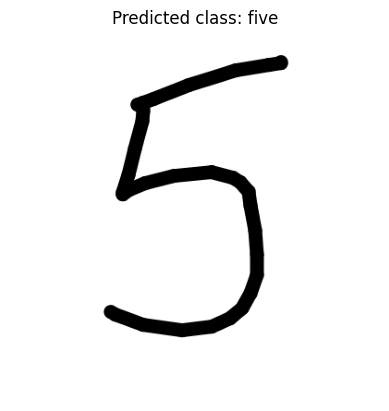

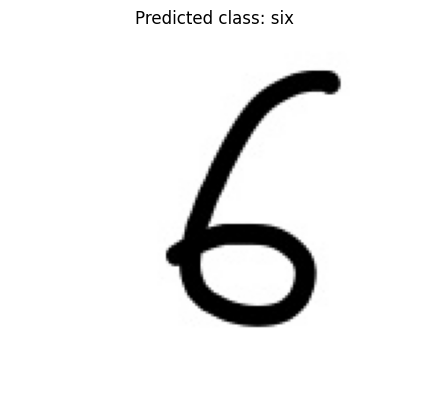

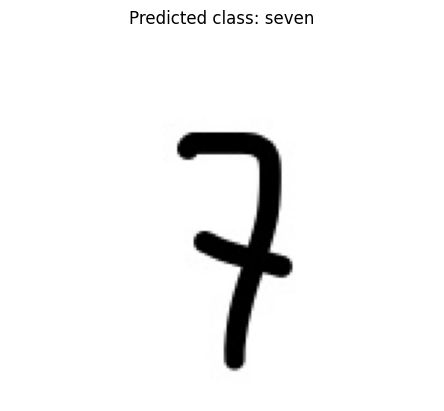

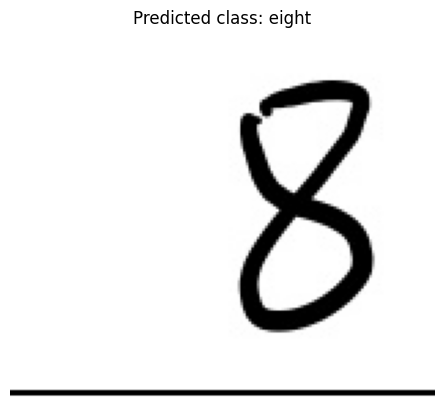

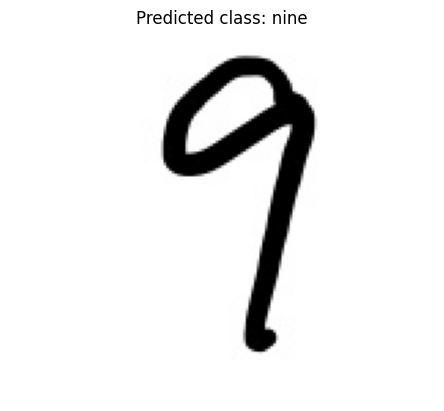

In [19]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec', 'div', 'eq', 'mul', 'sub', 'x', 'y', 'z']
full_class_names = {
    '0': 'zero', '1': 'one', '2': 'two', '3': 'three', '4': 'four', 
    '5': 'five', '6': 'six', '7': 'seven', '8': 'eight', '9': 'nine', 
    'add': 'addition', 'dec': 'decimal', 'div': 'division', 'eq': 'equals', 
    'mul': 'multiplication', 'sub': 'subtraction', 'x': 'variable x', 
    'y': 'variable y', 'z': 'variable z'
}

folder_path = 'trial_data'
for img_filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_filename)
    
    img = Image.open(img_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0)

    with torch.no_grad():
        output = model(img_tensor)
        _, predicted = torch.max(output, 1)

    predicted_class = class_names[predicted.item()]
    predicted_full_name = full_class_names[predicted_class]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted class: {predicted_full_name}')
    plt.show()
